# Clustering
Clustering is an important technique to group similar image pixels based on their signal properties, such as brightness, color, or even morphological features.

## Data
In this lecture, we will use the same coin image as the lecture material.

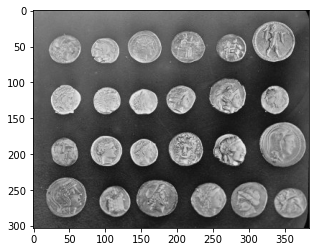

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

image = data.coins()
plt.imshow(image, cmap="gray")

In [74]:
image

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

In [75]:
image.shape

(303, 384)

## Insepct the piexl distribution
* Here we have to redefine our plotting function to deal with clustering information. We don't need to cover the details for now.

In [76]:
def plot_histogram(data, which_cluster=None, nbin=40):
    data = data.reshape(-1)
    if which_cluster is None:
        which_cluster = np.zeros(data.shape, dtype=int)
    else:
        which_cluster = which_cluster.reshape(-1)
    fig, ax = plt.subplots()
    bins = np.linspace(data.min(), data.max(), nbin)
    for k in np.unique(which_cluster):
        subset = data[which_cluster==k]
        ax.hist(subset, bins=bins, alpha=0.8,
                label="Cluster %d" % k, edgecolor="black")
    ax.legend()
    plt.show()

* We can turn the 2D image into 1D signals by NumPy.

In [79]:
# keep the dimension information for recovering the matrix dimension
h, w = image.shape
# flatten: reshape 2D image into 1D signal
signals =  image.reshape(h * w).astype(int)
# inspect the signals

In [80]:
image

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

In [82]:
signals

array([ 47, 123, 133, ...,   4,  10,   7])

In [ ]:
image.shape

(303, 384)

* You will found that the distributions are exact the same

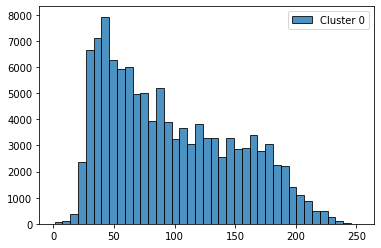

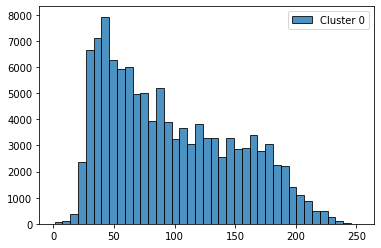

In [83]:
plot_histogram(image)
plot_histogram(signals)

## K-Means Clustering Algorithm
K-means clustering algorithm is an iterative strategy to minimize the distance between each point to the cluster centers.

### Stage of Assignment

* First, say we want to cluster pixels into three group. Hence, we assign k = 3. And we can randomly generate centers for each cluster.

In [85]:
signals

array([ 47, 123, 133, ...,   4,  10,   7])

In [92]:
k = 3
centers = np.random.choice(signals, k)

In [93]:
centers

array([ 77,  62, 124])

In [94]:
# create a container to store the distances
distances = np.zeros((w * h, k))
print("Dimension: ", distances.shape)
print(distances)

Dimension:  (116352, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [95]:
for i, signal in enumerate(signals):
    for j, center in enumerate(centers):
        distances[i, j] = abs(signal - center)
distances

array([[ 30.,  15.,  77.],
       [ 46.,  61.,   1.],
       [ 56.,  71.,   9.],
       ...,
       [ 73.,  58., 120.],
       [ 67.,  52., 114.],
       [ 70.,  55., 117.]])

In [96]:
which_cluster = np.argmin(distances, axis=1)
which_cluster

array([1, 2, 2, ..., 1, 1, 1])

In [97]:
for i in range(k):
    centers[i] = signals[which_cluster == i].mean()

In [98]:
def assignment(signals, centers):
    n = len(signals)
    k = len(centers)
    distances = np.zeros((n, k))
    for i, signal in enumerate(signals):
        for j, center in enumerate(centers):
            distances[i, j] = abs(signal - center)
    which_cluster = np.argmin(distances, axis=1)
    return which_cluster

In [99]:
def update(signals, which_cluster, k):
    new_centers = np.zeros(k)
    for i in range(k):
        new_centers[i] = signals[which_cluster == i].mean()
    return new_centers

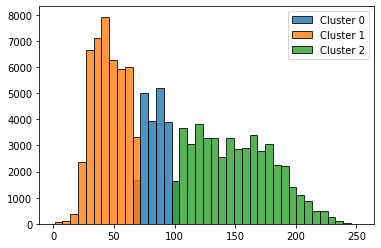

In [100]:
plot_histogram(signals, which_cluster)

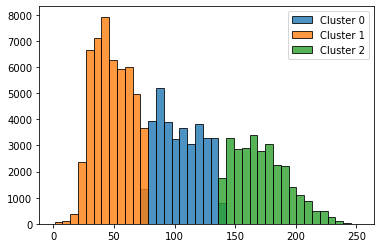

In [101]:
for i in range(20):
    which_cluster = assignment(signals, centers)
    centers = update(signals, which_cluster, k)
plot_histogram(signals, which_cluster)

In [102]:
image_cluster = which_cluster.reshape((h, w))

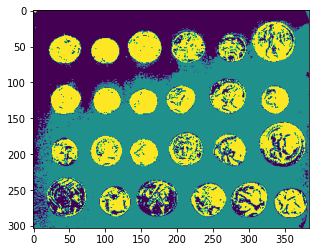

In [103]:
plt.imshow(image_cluster)

In [104]:
def kmeans(image, k, n_iter):
    h, w = image.shape
    signals = image.reshape(h * w).astype(int)
    centers = np.random.choice(signals, k)
    for _ in range(n_iter):
        which_cluster = assignment(signals, centers)
        centers = update(signals, which_cluster, k)
    image_cluster = which_cluster.reshape((h, w))
    return image_cluster, centers

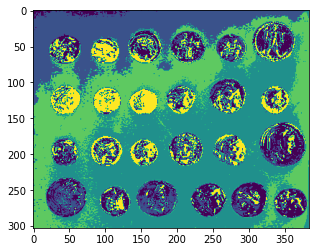

In [ ]:
image_cluster, centers = kmeans(image, k=5, n_iter=10)
plt.imshow(image_cluster)

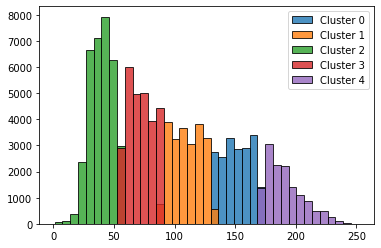

In [ ]:
plot_histogram(image, image_cluster)

In [ ]:
image_cluster, centers = kmeans(image, k=10, n_iter=20)


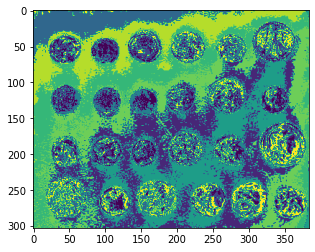

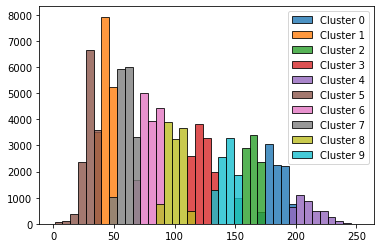

In [ ]:
plt.imshow(image_cluster)
plot_histogram(image, image_cluster)

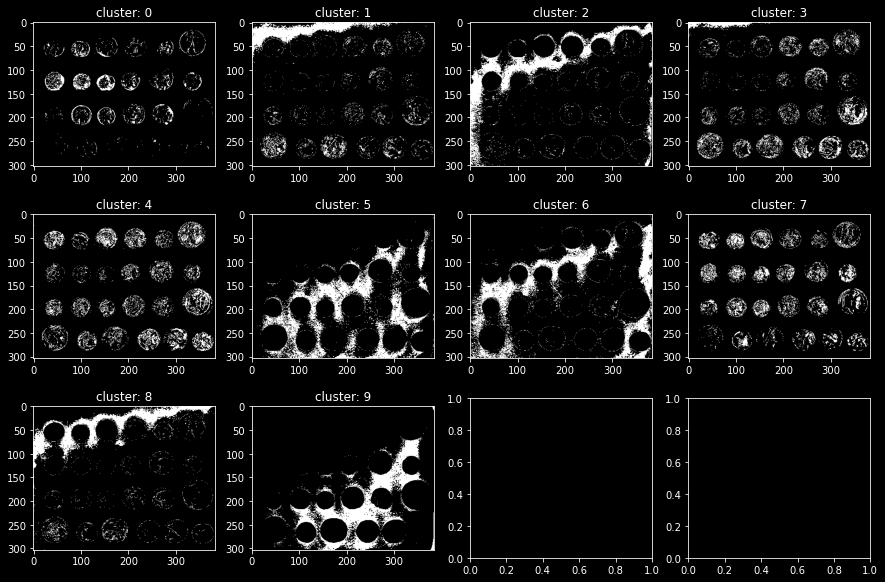

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
i = 0
for r in range(3):
    for c in range(4):
        if i < 10:
            axs[r, c].imshow(image_cluster == i, cmap="gray")
            axs[r, c].set_title("cluster: %d" % i)
        i += 1


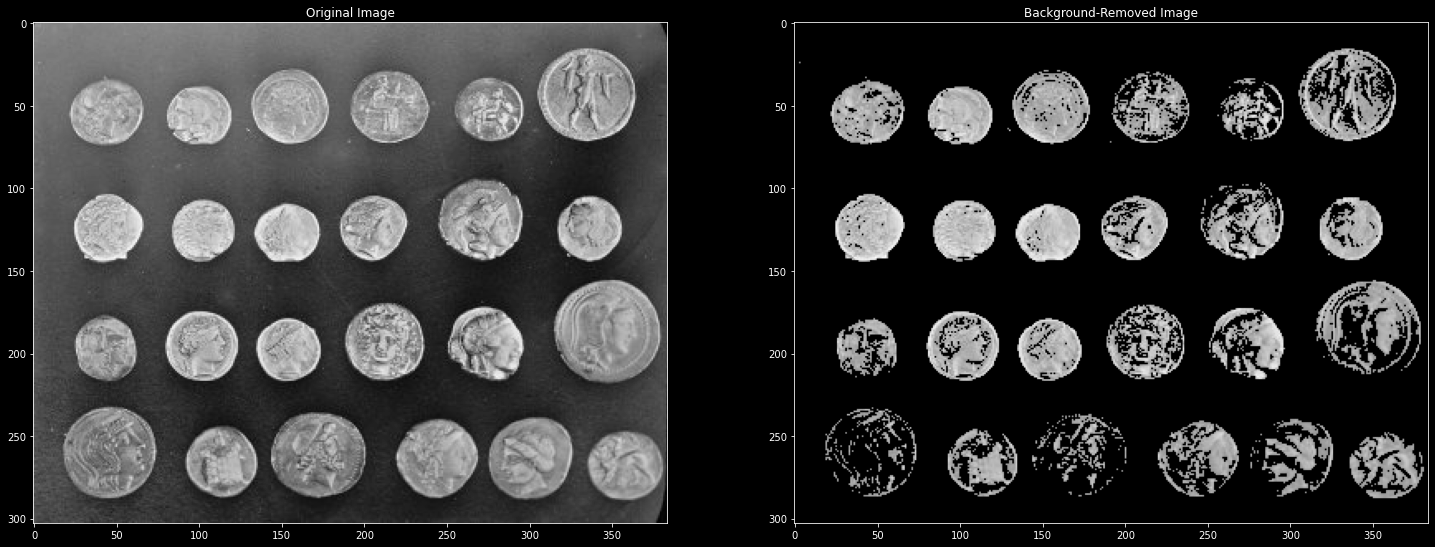

In [ ]:
mask = (image_cluster == 0) + (image_cluster == 7) + (image_cluster == 4)
new_image = np.zeros(image.shape)
new_image[mask] = image[mask]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 15))
axes[0].imshow(image, cmap="gray")
axes[0].title.set_text("Original Image")
axes[1].imshow(new_image, cmap="gray")
axes[1].title.set_text("Background-Removed Image")

In [105]:
image = plt.imread('panda.jpeg') #dog.jpeg

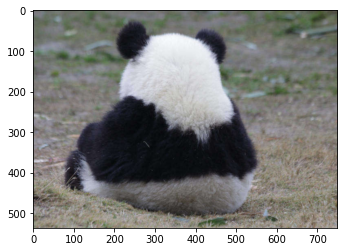

In [106]:
plt.imshow(image)

In [107]:
image=image[:,:,0]

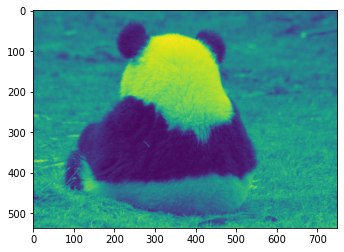

In [108]:
plt.imshow(image)

In [109]:
image.shape

(536, 750)

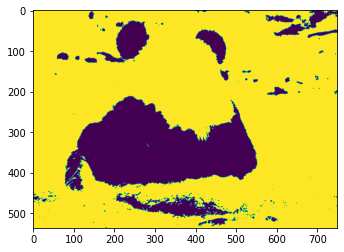

In [110]:
image_cluster, centers = kmeans(image, k=2, n_iter=10)
plt.imshow(image_cluster)

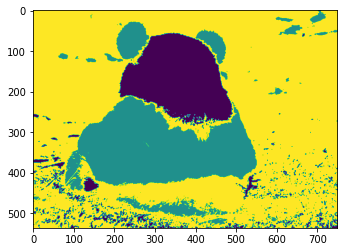

In [111]:
image_cluster, centers = kmeans(image, k=3, n_iter=10)
plt.imshow(image_cluster)

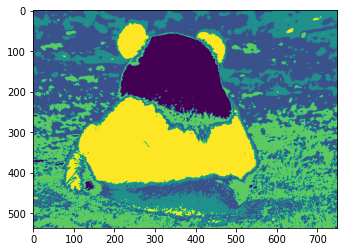

In [112]:
image_cluster, centers = kmeans(image, k=5, n_iter=10)
plt.imshow(image_cluster)